
<center>

<font color='blue'>**ĐỒ ÁN CUỐI KỲ DỮ LIỆU LỚN**


**ĐỀ TÀI: ỨNG DỤNG PHÂN TÍCH DỮ LIỆU LỚN TRONG PHÂN KHÚC KHÁCH HÀNG: NGHIÊN CỨU TRÊN BỘ DATA UK RETAILER**

**Giáo viên hướng dẫn:**

| No. | Full Name |
|-------|-------|
| 1 | TS. Nguyễn Hồ Duy Tri |

**Sinh viên thực hiện**

| No. | Full Name | Student Code |
|-------|-------|-------|
| 1 | Nguyễn Quốc Khánh | 20521452 |
| 2 | Bùi Thị Thanh Ngân | 20521643 |
| 3 | Nguyễn Thị Phương Nhi| 19520814 |
| 4 | Phạm Lê Trưởng | 20522090 |

</center>

**Phân khúc khách hàng là việc tìm và lựa chọn nhóm khách hàng mà doanh nghiệp, tổ chức có khẳ năng thỏa mãn nhu cầu tốt hơn đối thủ cạnh tranh. mình tham khảo ở đây**

Mục đích:

- Để lựa chọn khách hàng phù hợp và phục vụ một cách tốt nhất
- Tạo lợi thế cạnh tranh với các đối thủ trên thị trường
- Thấu hiểu khách hàng và khẳng định thương hiệu Cách để phân khúc khách hàng mà các doanh nghiệp hiện nay đang thực hiện:
- Địa lý
- Giới tính
- Độ tuổi
- Thu nhập.

# Import thư viện

In [ ]:
!pip install pyspark

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql.functions import col, datediff, lit, to_date,expr, unix_timestamp

# Build SparkSession

**SparkSession** trong Python SDK của Apache Spark là một điểm truy cập chính để sử dụng các chức năng của Spark. Nó cho phép bạn tạo và thao tác các DataFrames, thực hiện các truy vấn SQL, đọc dữ liệu từ nhiều nguồn khác nhau, và thực hiện các tác vụ phân tích và xử lý dữ liệu phức tạp.

In [ ]:
spark = SparkSession.builder \
    .appName("Example") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()


**Định nghĩa Schema cho DataFrame**

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType

# Định nghĩa schema cho DataFrame
schema = StructType([
    StructField("InvoiceNo", IntegerType(), True),
    StructField("StockCode", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Quantity", IntegerType(), True),
    StructField("InvoiceDate", StringType(), True),
    StructField("UnitPrice", FloatType(), True),
    StructField("CustomerID", IntegerType(), True),
    StructField("Country", StringType(), True)
])

# Load Dataset

Bộ dataset "**Online Retail**" từ UCI Machine Learning Repository chứa dữ liệu giao dịch từ ngày 01/12/2010 đến 09/12/2011 của một công ty bán lẻ trực tuyến không có cửa hàng, đặt trụ sở tại Vương quốc Anh.

**Đặc điểm của Dataset:**

- Loại: Multivariate, Sequential, Time-Series.
- Lĩnh vực: Business.
- Nhiệm vụ liên quan: Classification, Clustering.
- Loại đặc trưng: Integer, Real.
- Số lượng Instances: 541,909.
- Số lượng Features: 6.

**Thông tin chi tiết về các biến:**

- InvoiceNo: Mã hóa đơn, một số nguyên 6 chữ số duy nhất cho mỗi giao dịch. Nếu bắt đầu bằng chữ 'c', nó chỉ ra một hủy bỏ.
- StockCode: Mã sản phẩm, một số nguyên 5 chữ số duy nhất cho mỗi sản phẩm khác nhau.
- Description: Tên sản phẩm.
- Quantity: Số lượng của mỗi sản phẩm trong mỗi giao dịch.
- InvoiceDate: Ngày và thời gian tạo giao dịch.
- UnitPrice: Giá mỗi đơn vị sản phẩm, tính bằng sterling (Bảng Anh).
- CustomerID: Mã khách hàng, một số nguyên 5 chữ số duy nhất cho mỗi khách hàng.
- Country: Tên quốc gia nơi khách hàng cư trú.


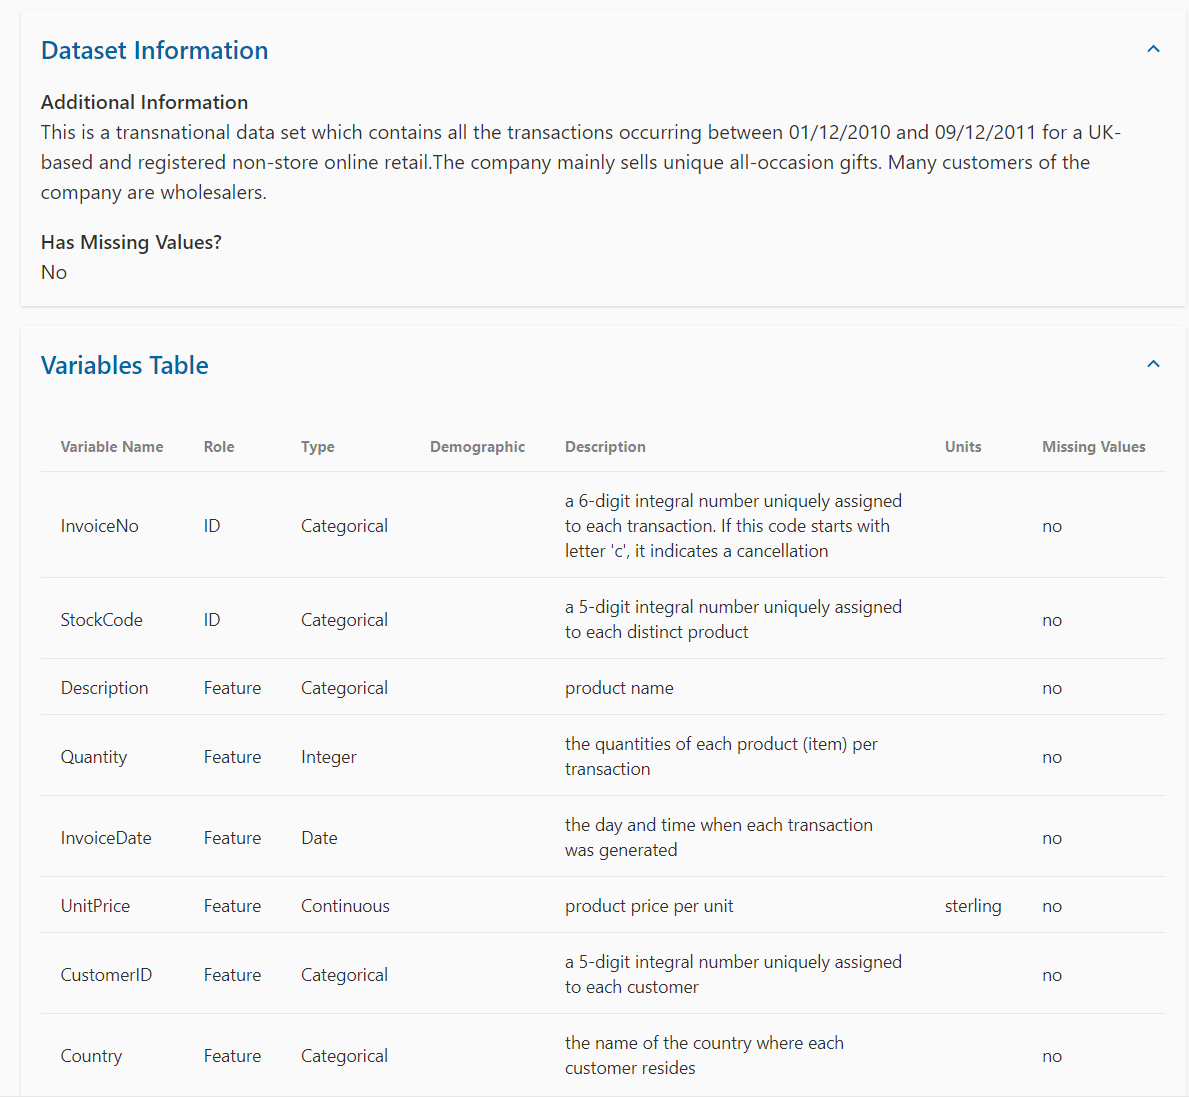

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data = spark.read.csv("/content/drive/MyDrive/Dữ liệu lớn/data.csv", header=True, schema=schema)
data = spark.read.csv("/content/drive/MyDrive/Online_Retail.csv", header=True, schema=schema)

In [ ]:
data.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [ ]:
data.printSchema()

root
 |-- InvoiceNo: integer (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



# Data Preprocessing

In [ ]:
data = data.withColumn('InvoiceDate', to_date(col('InvoiceDate'), 'MM/dd/yyyy HH:mm'))

In [ ]:
data.describe().show()

+-------+------------------+------------------+--------------------+------------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+-----------------+------------------+-----------+
|  count|            532618|            541909|              540455|            541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0|  9.55224954743324|4.611113614622466|15287.690570239585|       NULL|
| stddev|13428.417280800133| 16799.73762842775|                NULL|218.08115785023486|96.75985330031472| 1713.600303321594|       NULL|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|            -80995|        -11062.06|             12346|  Australia|
|    max|            581587|             

In [ ]:
for column_name in data.columns:
  count_null = data.filter(col(column_name).isNull()).count()
  print(f"Value Null in column '{column_name}': {count_null}")

Value Null in column 'InvoiceNo': 9291
Value Null in column 'StockCode': 0
Value Null in column 'Description': 1454
Value Null in column 'Quantity': 0
Value Null in column 'InvoiceDate': 0
Value Null in column 'UnitPrice': 0
Value Null in column 'CustomerID': 135080
Value Null in column 'Country': 0


In [ ]:
#Loai bo du lieu co gia tri trong
data = data.dropna()

In [ ]:
print(f"Số lượng mẫu trùng lặp {data.count() - data.dropDuplicates().count()}")

Số lượng mẫu trùng lặp 5193


In [ ]:
data = data.dropDuplicates() # loại bỏ mẫu trùng

In [ ]:
data = data[(data['UnitPrice']> 0) & (data['Quantity']>0)]

# EDA

In [ ]:
print(f'Kich thước dữ liệu: ({data.count()}, {len(data.columns)})')

Kich thước dữ liệu: (392691, 8)


In [ ]:
data.createOrReplaceTempView("data")

In [ ]:
spark.sql("SELECT * FROM data").summary().show()

+-------+------------------+------------------+--------------------+------------------+------------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|         UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+------------------+------------------+-----------+
|  count|            392691|            392691|              392691|            392691|            392691|            392691|     392691|
|   mean| 560590.8582600569|27424.724934027825|                NULL|13.119730271383862|3.1259168821380965|15287.845186164184|       NULL|
| stddev|13087.076194391726| 16396.68784047916|                NULL| 180.4930609325422|22.241863922204374| 1713.541530687972|       NULL|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|                 1|             0.001|             12346|  Australia|
|    25%|            549234|      

In [ ]:
most_recent_purchase = spark.sql("SELECT MAX(InvoiceDate) AS most_recent_purchase FROM data")
most_recent_purchase.show()

+--------------------+
|most_recent_purchase|
+--------------------+
|          2011-12-09|
+--------------------+



In [ ]:
from pyspark.sql.functions import col, datediff, lit, to_date,expr, unix_timestamp

In [ ]:
most_recent_purchase_expr = spark.sql("SELECT MAX(InvoiceDate) AS most_recent_purchase FROM data").first()[0]

In [ ]:
data_with_recency = data.withColumn(
    "Recency",
    expr(f"DATEDIFF('{most_recent_purchase_expr}', InvoiceDate)")
)
data_with_recency.show()


+---------+---------+--------------------+--------+-----------+---------+----------+--------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|InvoiceDate|UnitPrice|CustomerID|       Country|Recency|
+---------+---------+--------------------+--------+-----------+---------+----------+--------------+-------+
|   536376|    22114|HOT WATER BOTTLE ...|      48| 2010-12-01|     3.45|     15291|United Kingdom|    373|
|   536381|   84971S|SMALL HEART FLOWE...|       6| 2010-12-01|     0.85|     15311|United Kingdom|    373|
|   536387|    22780|LIGHT GARLAND BUT...|     192| 2010-12-01|     3.37|     16029|United Kingdom|    373|
|   536404|    22383|LUNCH BAG SUKI  D...|      10| 2010-12-01|     1.65|     16218|United Kingdom|    373|
|   536408|    84949|SILVER HANGING T-...|       6| 2010-12-01|     1.65|     14307|United Kingdom|    373|
|   536420|    21891|TRADITIONAL WOODE...|      12| 2010-12-01|     1.25|     16583|United Kingdom|    373|
|   536500|   46000M|POLYEST

In [ ]:
from pyspark.sql.functions import min as spark_min


In [ ]:
df_recent = data_with_recency.groupBy('CustomerID').agg(spark_min('Recency').alias('Recency'))

In [ ]:
df_recent.select('Recency').describe().show()

+-------+------------------+
|summary|           Recency|
+-------+------------------+
|  count|              4338|
|   mean| 92.05947441217151|
| stddev|100.01226424171837|
|    min|                 0|
|    max|               373|
+-------+------------------+



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_recent_pd = df_recent.toPandas()

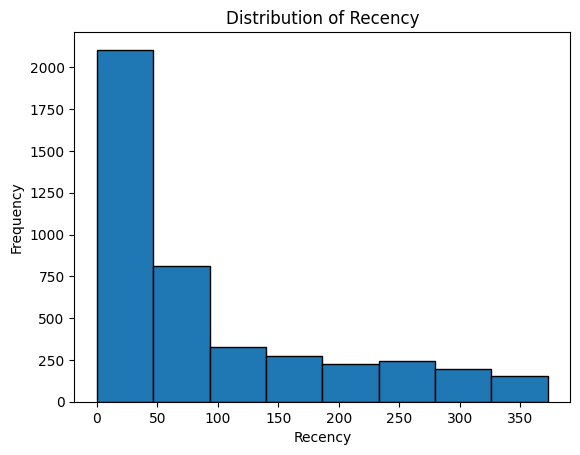

In [ ]:
plt.hist(df_recent_pd['Recency'], bins=8, edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of Recency')
plt.show()

In [ ]:
from pyspark.sql.functions import countDistinct
df_freq = data_with_recency.groupBy('CustomerID').agg(countDistinct('InvoiceDate').alias('unique_invoice_count'))


In [ ]:
df_freq_pd = df_freq.toPandas()

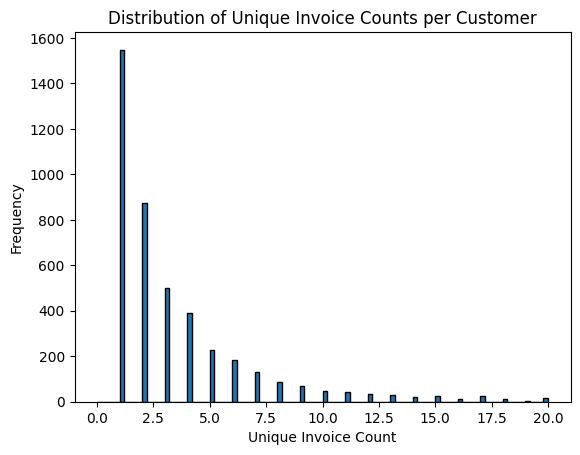

In [ ]:
plt.hist(df_freq_pd['unique_invoice_count'], bins=100, range=(0, 20), edgecolor='black')
plt.xlabel('Unique Invoice Count')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Invoice Counts per Customer')
plt.show()

In [ ]:
from pyspark.sql.functions import count
df_freq_counts = df_freq.groupBy('unique_invoice_count').agg(count('*').alias('count'))
df_freq_counts.show()


+--------------------+-----+
|unique_invoice_count|count|
+--------------------+-----+
|                  26|    6|
|                  29|    4|
|                  19|    5|
|                  54|    1|
|                 113|    1|
|                 112|    1|
|                  22|    2|
|                   7|  132|
|                  32|    2|
|                  43|    1|
|                  31|    1|
|                  39|    1|
|                  25|    5|
|                  71|    1|
|                   6|  184|
|                   9|   67|
|                  27|    2|
|                  17|   24|
|                  41|    1|
|                  33|    2|
+--------------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import sum

In [ ]:
# Calculate the 'Amount' column
data = data.withColumn("Amount", col("UnitPrice") * col("Quantity"))

# Group by 'CustomerID' and sum the 'Amount'
df_monetary = data.groupBy('CustomerID').agg(sum('Amount').alias('total_amount'))


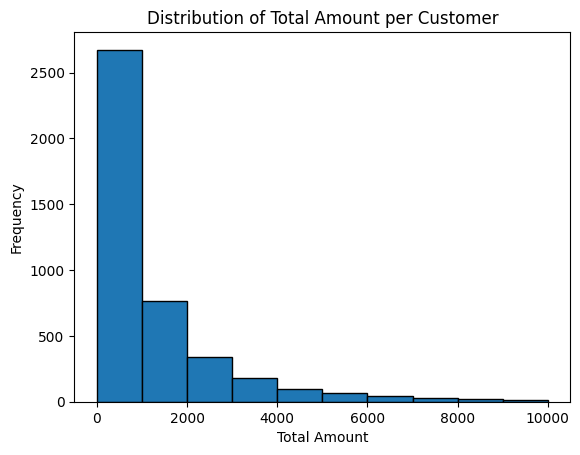

In [ ]:
# Convert to Pandas DataFrame for plotting (assuming the data is small enough)
df_monetary_pd = df_monetary.toPandas()

# Plot the histogram using Matplotlib or any other plotting library
plt.hist(df_monetary_pd['total_amount'], bins=10, range=(0, 10000), edgecolor='black')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Total Amount per Customer')
plt.show()

In [ ]:
from pyspark.sql.types import StringType, StructType, StructField

In [ ]:
# Assuming df_recent, df_freq, and df_monetary are DataFrames in Spark
df_recent.createOrReplaceTempView("df_recent")
df_freq.createOrReplaceTempView("df_freq")
df_monetary.createOrReplaceTempView("df_monetary")

In [ ]:
# # Create an empty DataFrame with 'CustomerID', 'Country', and 'Quantity' columns
# rfm_df = unique_customer_ids.join(data.select("CustomerID", "Country", "Quantity").distinct(), on="CustomerID", how="left")

# # Populate 'CustomerID' column with values from df_recent
# rfm_df = rfm_df.withColumn("CustomerID", col("CustomerID").cast("string"))
# rfm_df = rfm_df.join(df_recent.select("CustomerID", "min_recency"), on="CustomerID", how="left")

# # Merge df_freq on 'CustomerID'
# rfm_df = rfm_df.join(df_freq.select("CustomerID", "unique_invoice_count").withColumnRenamed("unique_invoice_count", "Frequency"), on="CustomerID", how="left")

# # Merge df_monetary on 'CustomerID'
# rfm_df = rfm_df.join(df_monetary.select("CustomerID", "total_amount").withColumnRenamed("total_amount", "Monetary"), on="CustomerID", how="left")

# # Show the resulting DataFrame
# rfm_df.show()

In [ ]:
from pyspark.ml.feature import StringIndexer

In [ ]:
# Get unique CustomerID values from the data DataFrame
unique_customer_ids = spark.sql("SELECT DISTINCT CustomerID FROM data").select("CustomerID")

# Create an empty DataFrame with 'CustomerID', 'Country', and 'Quantity' columns
rfm_df = unique_customer_ids.join(data.select("CustomerID", "Country").distinct(), on="CustomerID", how="left")

# Populate 'CustomerID' column with values from df_recent
rfm_df = rfm_df.withColumn("CustomerID", col("CustomerID").cast("string"))
rfm_df = rfm_df.join(df_recent.select("CustomerID", "Recency"), on="CustomerID", how="left")

# Merge df_freq on 'CustomerID'
rfm_df = rfm_df.join(df_freq.select("CustomerID", "unique_invoice_count").withColumnRenamed("unique_invoice_count", "Frequency"), on="CustomerID", how="left")

# Merge df_monetary on 'CustomerID'
rfm_df = rfm_df.join(df_monetary.select("CustomerID", "total_amount").withColumnRenamed("total_amount", "Monetary"), on="CustomerID", how="left")

# Show the resulting DataFrame
rfm_df.show()

+----------+--------------+-------+---------+------------------+
|CustomerID|       Country|Recency|Frequency|          Monetary|
+----------+--------------+-------+---------+------------------+
|     17420|United Kingdom|     50|        3| 598.8299922943115|
|     16503|United Kingdom|    106|        4|1431.9299898147583|
|     15727|United Kingdom|     16|        7| 5159.060026824474|
|     17389|United Kingdom|      0|       32| 31833.67953133583|
|     15447|United Kingdom|    330|        1|155.17000007629395|
|     14450|United Kingdom|    180|        3|483.24999475479126|
|     13623|United Kingdom|     30|        5| 727.7399979829788|
|     13285|United Kingdom|     23|        4|2709.1199946403503|
|     16339|United Kingdom|    284|        1| 94.04999852180481|
|     14570|United Kingdom|    280|        1|218.05999767780304|
|     16386|United Kingdom|     28|        2| 302.5700000450015|
|     16861|United Kingdom|     59|        2|173.76000595092773|
|     18024|United Kingdo

# Data Encoding

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

inputcols = ["Country"]
outputcols = [feature_name + "_encode" for feature_name in inputcols]
indexers = StringIndexer(inputCols=inputcols, outputCols=outputcols)
df_encode = indexers.fit(rfm_df).transform(rfm_df)

In [ ]:
df_encode.show()

+----------+--------------+-------+---------+------------------+--------------+
|CustomerID|       Country|Recency|Frequency|          Monetary|Country_encode|
+----------+--------------+-------+---------+------------------+--------------+
|     17420|United Kingdom|     50|        3| 598.8299922943115|           0.0|
|     16503|United Kingdom|    106|        4|1431.9299898147583|           0.0|
|     15727|United Kingdom|     16|        7| 5159.060026824474|           0.0|
|     17389|United Kingdom|      0|       32| 31833.67953133583|           0.0|
|     15447|United Kingdom|    330|        1|155.17000007629395|           0.0|
|     14450|United Kingdom|    180|        3|483.24999475479126|           0.0|
|     13623|United Kingdom|     30|        5| 727.7399979829788|           0.0|
|     13285|United Kingdom|     23|        4|2709.1199946403503|           0.0|
|     16339|United Kingdom|    284|        1| 94.04999852180481|           0.0|
|     14570|United Kingdom|    280|     

# RFM Model

In [ ]:
input_feature = ["Country_encode", "Recency",
                 "Frequency","Monetary"]
df_encode.select(input_feature).show()

+--------------+-------+---------+------------------+
|Country_encode|Recency|Frequency|          Monetary|
+--------------+-------+---------+------------------+
|           0.0|     50|        3| 598.8299922943115|
|           0.0|    106|        4|1431.9299898147583|
|           0.0|     16|        7| 5159.060026824474|
|           0.0|      0|       32| 31833.67953133583|
|           0.0|    330|        1|155.17000007629395|
|           0.0|    180|        3|483.24999475479126|
|           0.0|     30|        5| 727.7399979829788|
|           0.0|     23|        4|2709.1199946403503|
|           0.0|    284|        1| 94.04999852180481|
|           0.0|    280|        1|218.05999767780304|
|           0.0|     28|        2| 302.5700000450015|
|           0.0|     59|        2|173.76000595092773|
|           0.0|    152|        1| 389.7800012230873|
|           0.0|    333|        3| 875.9999847412109|
|           0.0|     23|        2| 562.4099985659122|
|           1.0|      2|    

# Feature Vectors

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

assembler = VectorAssembler(inputCols=input_feature, outputCol="feature")
df = assembler.transform(df_encode).select("feature")

In [ ]:
df.show()

+--------------------+
|             feature|
+--------------------+
|[0.0,50.0,3.0,598...|
|[0.0,106.0,4.0,14...|
|[0.0,16.0,7.0,515...|
|[0.0,0.0,32.0,318...|
|[0.0,330.0,1.0,15...|
|[0.0,180.0,3.0,48...|
|[0.0,30.0,5.0,727...|
|[0.0,23.0,4.0,270...|
|[0.0,284.0,1.0,94...|
|[0.0,280.0,1.0,21...|
|[0.0,28.0,2.0,302...|
|[0.0,59.0,2.0,173...|
|[0.0,152.0,1.0,38...|
|[0.0,333.0,3.0,87...|
|[0.0,23.0,2.0,562...|
|[1.0,2.0,20.0,197...|
|[0.0,61.0,3.0,990...|
|[0.0,4.0,5.0,400....|
|[1.0,23.0,9.0,662...|
|[0.0,15.0,5.0,161...|
+--------------------+
only showing top 20 rows



# Standardize features

In [ ]:
scale = StandardScaler(inputCol="feature", outputCol="feature_scaled")
df = scale.fit(df).transform(df)

# PCA (dimensionality reduction)

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import PCA

pca = PCA(k=4, inputCol="feature_scaled", outputCol="feature_scaled_pca")
df= pca.fit(df).transform(df)

In [ ]:
df.show()

+--------------------+--------------------+--------------------+
|             feature|      feature_scaled|  feature_scaled_pca|
+--------------------+--------------------+--------------------+
|[0.0,50.0,3.0,598...|[0.0,0.5002747982...|[-0.1667804548667...|
|[0.0,106.0,4.0,14...|[0.0,1.0605825722...|[-0.0997488796308...|
|[0.0,16.0,7.0,515...|[0.0,0.1600879354...|[-1.0677130928056...|
|[0.0,0.0,32.0,318...|[0.0,0.0,5.381425...|[-5.7477408053009...|
|[0.0,330.0,1.0,15...|[0.0,3.3018136682...|[1.26617379867312...|
|[0.0,180.0,3.0,48...|[0.0,1.8009892735...|[0.38819404006277...|
|[0.0,30.0,5.0,727...|[0.0,0.3001648789...|[-0.4841222327072...|
|[0.0,23.0,4.0,270...|[0.0,0.2301264071...|[-0.5356126700926...|
|[0.0,284.0,1.0,94...|[0.0,2.8415608538...|[1.07671021853772...|
|[0.0,280.0,1.0,21...|[0.0,2.8015388699...|[1.05147296232073...|
|[0.0,28.0,2.0,302...|[0.0,0.2801538869...|[-0.1270855439230...|
|[0.0,59.0,2.0,173...|[0.0,0.5903242618...|[0.01211444094994...|
|[0.0,152.0,1.0,38...|[0.

In [ ]:
df = df.select("feature_scaled_pca")

In [ ]:
df.select("feature_scaled_pca").collect()[:5]

[Row(feature_scaled_pca=DenseVector([-0.1668, 0.2152, 0.4781, -0.4545])),
 Row(feature_scaled_pca=DenseVector([-0.0997, 0.4774, 0.9619, -0.6631])),
 Row(feature_scaled_pca=DenseVector([-1.0677, 0.1511, 0.5396, -0.5363])),
 Row(feature_scaled_pca=DenseVector([-5.7477, 0.5757, 2.3094, -1.683])),
 Row(feature_scaled_pca=DenseVector([1.2662, 1.4601, 2.5033, -0.9638]))]

# KMeans

## Silhouette score

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Xây dựng mô hình K-means
scores, max_score, best_model, df_predictions = [], 0, _, _
for k in range(2,10):
  kmeans = KMeans(k=k, seed=42, featuresCol='feature_scaled_pca')  # Số lượng cụm (k) cần xác định trước
  model = kmeans.fit(df)

  # Dự đoán nhãn cụm cho từng dòng
  predictions = model.transform(df)

  evaluator = ClusteringEvaluator(featuresCol='feature_scaled_pca')
  # Silhouette Score đo độ tách biệt giữa các cụm và đồng đều bên trong các cụm
  silhouette_score = evaluator.evaluate(predictions)
  scores.append(silhouette_score)

  if silhouette_score > max_score:
    max_score = silhouette_score
    best_model = model
    df_predictions = predictions

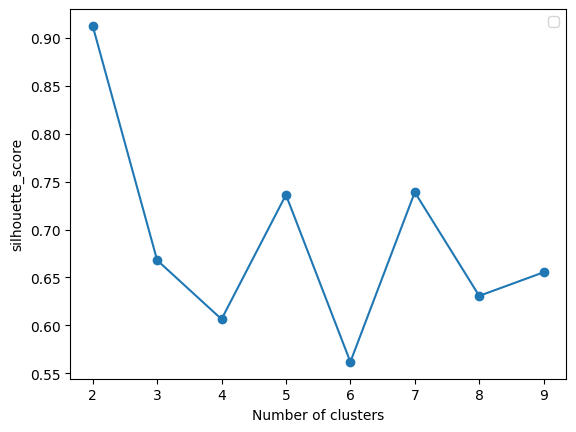

In [ ]:
import matplotlib.pyplot as plt

plt.plot([k for k in range(2,10)], scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.legend()
plt.show()

## Elbow Method

# RFM Segmantation

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

df_fea = df_encode.select(rfm_df.columns).withColumn("id", monotonically_increasing_id())
df_pred = df_predictions.withColumnRenamed("prediction", "Cluster").select("Cluster").withColumn("id", monotonically_increasing_id())
result_df = df_fea.join(df_pred, "id").drop("id")
result_df.show()
print('Score: ', max_score)

AnalysisException: ignored

In [ ]:
rfm_df.createOrReplaceTempView("RFM")

In [ ]:
df.createOrReplaceTempView("df")

# KMeans Clustering (Không dùng thư viện)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
import numpy as np
import random

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("KMeansClustering").getOrCreate()

# feature_columns = "feature_scaled_pca"
# k = 3

# # Call the clustering function and get the RDD
# clustered_data_rdd = kmeans_clustering(df, feature_columns, k)

# # Save the result to a file without collecting it on the driver
# # clustered_data_rdd.map(lambda x: Row(cluster_id=x[0], points=x[1])).toDF().write.format("parquet").save("clustered_data")
# clustered_data_rdd.map(lambda x: Row(cluster_id=x[0], points=x[1])).toDF().write.mode("overwrite").format("parquet").save("clustered_data")

# # Only stop the Spark session after all actions are done
# # spark.stop()

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

def assign_to_cluster(point, broadcast_centers):
    centers = broadcast_centers.value
    min_distance = float('inf')
    assigned_cluster = -1

    for i, center in enumerate(centers):
        distance = euclidean_distance(point, center)
        if distance < min_distance:
            min_distance = distance
            assigned_cluster = i

    return assigned_cluster

def kmeans_clustering(data, features_col, k, max_iter=10):
    sc = spark.sparkContext
    # Trích xuất đặc trưng từ DataFrame
    features_data = data.select(features_col).rdd.map(lambda row: row[0])

    # Khởi tạo ngẫu nhiên k trung tâm cụm bằng cách sử dụng takeSample thay vì collect
    centers = features_data.takeSample(False, k, 42)
    broadcast_centers = sc.broadcast(centers)

    # Thực hiện các vòng lặp của thuật toán K-means
    for iteration in range(max_iter):
        # Gán mỗi điểm vào cụm gần nhất
        cluster_assignment = features_data.map(lambda point: (assign_to_cluster(point, broadcast_centers), (point, 1)))

        # Tính toán trung tâm mới
        new_centers_rdd = cluster_assignment \
            .reduceByKey(lambda p1_c1, p2_c2: (np.add(p1_c1[0], p2_c2[0]), p1_c1[1] + p2_c2[1])) \
            .mapValues(lambda points_count: points_count[0] / points_count[1])

        # Cập nhật biến broadcast với các trung tâm mới
        broadcast_centers.unpersist()
        broadcast_centers = sc.broadcast(new_centers_rdd.values().collect())

    # Gán các trung tâm cuối cùng cho mỗi điểm dữ liệu
    clustered_data = features_data.map(lambda point: (assign_to_cluster(point, broadcast_centers), point))

    # Không cần thu thập ở đây, chỉ cần trả về RDD để sử dụng cho các hành động tiếp theo
    return clustered_data

scores, max_score, best_model, df_predictions = [], 0, _, _

for k in range(2, 10):
    # Gọi hàm gom cụm và nhận RDD
    clustered_data_rdd = kmeans_clustering(df, features_col="feature_scaled_pca", k=k)

    # Lưu kết quả vào một tệp mà không cần thu thập ở trình điều khiển
    clustered_data_rdd.map(lambda x: Row(cluster_id=x[0], points=x[1])).toDF().write.mode("overwrite").format("parquet").save("clustered_data")

    # Đọc tệp Parquet vào DataFrame
    clustered_data_df = spark.read.format("parquet").load("clustered_data")

    evaluator = ClusteringEvaluator(featuresCol='points', predictionCol='cluster_id')
    # Điểm Silhouette đo sự tách biệt giữa các cụm và đồng đều bên trong các cụm
    silhouette_score = evaluator.evaluate(clustered_data_df)

    scores.append(silhouette_score)
    print(f'k = {k}, silhouette_score = {silhouette_score}')
    if silhouette_score > max_score:
        max_score = silhouette_score
        df_predictions = clustered_data_df

k = 2, silhouette_score = 0.9220067732366631
k = 3, silhouette_score = 0.6064237540779608
k = 4, silhouette_score = 0.6955278680829424
k = 5, silhouette_score = 0.7275544515249367
k = 6, silhouette_score = 0.5379962935174385
k = 7, silhouette_score = 0.5976573802188403
k = 8, silhouette_score = 0.4144148830715305
k = 9, silhouette_score = 0.4365499875898107


In [ ]:
df.show()

+--------------------+
|  feature_scaled_pca|
+--------------------+
|[-0.1667804548667...|
|[-0.0997488796308...|
|[-1.0677130928056...|
|[-5.7477408053009...|
|[1.26617379867312...|
|[0.38819404006277...|
|[-0.4841222327072...|
|[-0.5356126700926...|
|[1.07671021853772...|
|[1.05147296232073...|
|[-0.1270855439230...|
|[0.01211444094994...|
|[0.50111239835097...|
|[1.00552989998967...|
|[-0.1657345082635...|
|[-3.6055076053181...|
|[-0.1470002435722...|
|[-0.5714037982462...|
|[-1.3905629765941...|
|[-0.6076188608119...|
+--------------------+
only showing top 20 rows



# Chạy lại thuật toán phân cụm KMeans với best Cluster là 2

In [ ]:
feature_columns = "feature_scaled_pca"
k = 2
# Call the clustering function and get the RDD
clustered_data_rdd = kmeans_clustering(df, feature_columns, k)

# Save the result to a file without collecting it on the driver
# clustered_data_rdd.map(lambda x: Row(cluster_id=x[0], points=x[1])).toDF().write.format("parquet").save("clustered_data")
clustered_data_rdd.map(lambda x: Row(cluster_id=x[0], points=x[1])).toDF().write.mode("overwrite").format("parquet").save("clustered_data")


In [ ]:
# Đọc file Parquet vào DataFrame
clustered_data_df = spark.read.format("parquet").load("clustered_data")

# Hiển thị kết quả
clustered_data_df.show()


+----------+--------------------+
|cluster_id|              points|
+----------+--------------------+
|         0|[-0.1667804548667...|
|         0|[-0.0997488796308...|
|         0|[-1.0677130928056...|
|         1|[-5.7477408053009...|
|         0|[1.26617379867312...|
|         0|[0.38819404006277...|
|         0|[-0.4841222327072...|
|         0|[-0.5356126700926...|
|         0|[1.07671021853772...|
|         0|[1.05147296232073...|
|         0|[-0.1270855439230...|
|         0|[0.01211444094994...|
|         0|[0.50111239835097...|
|         0|[1.00552989998967...|
|         0|[-0.1657345082635...|
|         1|[-3.6055076053181...|
|         0|[-0.1470002435722...|
|         0|[-0.5714037982462...|
|         0|[-1.3905629765941...|
|         0|[-0.6076188608119...|
+----------+--------------------+
only showing top 20 rows



In [ ]:
evaluator = ClusteringEvaluator(featuresCol='points', predictionCol='cluster_id')
# Silhouette Score đo độ tách biệt giữa các cụm và đồng đều bên trong các cụm
evaluator.evaluate(clustered_data_df)
# 0.5738002788135381 k=5

0.9220067732366631

# Decoding results

In [ ]:
# Thêm cột ID vào data rfm ban đầu
df_fea1 = rfm_df.withColumn("id", monotonically_increasing_id())

# Đọc kết quả clustering từ file Parquet
clustered_data_df = spark.read.format("parquet").load("clustered_data")

# Thêm cột ID vào kết quả clustering
df_pred1 = clustered_data_df.withColumn("id", monotonically_increasing_id())

# Kết hợp DataFrame gốc với kết quả clustering bằng cách sử dụng ID
result_df = df_fea1.join(df_pred1, "id").drop("id").drop("points")

# Hiển thị DataFrame cuối cùng
result_df.show()


+----------+--------------+-------+---------+------------------+----------+
|CustomerID|       Country|Recency|Frequency|          Monetary|cluster_id|
+----------+--------------+-------+---------+------------------+----------+
|     17420|United Kingdom|     50|        3| 598.8299922943115|         0|
|     16503|United Kingdom|    106|        4|1431.9299898147583|         0|
|     15727|United Kingdom|     16|        7| 5159.060026824474|         0|
|     17389|United Kingdom|      0|       32| 31833.67953133583|         1|
|     15447|United Kingdom|    330|        1|155.17000007629395|         0|
|     14450|United Kingdom|    180|        3|483.24999475479126|         0|
|     13623|United Kingdom|     30|        5| 727.7399979829788|         0|
|     13285|United Kingdom|     23|        4|2709.1199946403503|         0|
|     16339|United Kingdom|    284|        1| 94.04999852180481|         0|
|     14570|United Kingdom|    280|        1|218.05999767780304|         0|
|     16386|

# **Phân khúc khách hàng bằng RFM: Tính trung bình rank các biến**

Mapping giá trị các trường Recency, Frequency, Monetary với rank tương ứng trong ngưỡng ranks là 10. Hãy cùng xem phân phối điểm rank của khách hàng như thế nào thông qua biểu đồ histogram với số lượng bins = 10.

+----------+--------------+-------+---------+------------------+----------+-----------+-------------+------------+---------+
|CustomerID|       Country|Recency|Frequency|          Monetary|cluster_id|RecencyRank|FrequencyRank|MonetaryRank|FinalRank|
+----------+--------------+-------+---------+------------------+----------+-----------+-------------+------------+---------+
|     14646|   Netherlands|      1|       45|280206.01928541064|         1|         10|            1|           1|        4|
|     18102|United Kingdom|      0|       26|259657.30005669594|         1|         10|            1|           1|        4|
|     17450|United Kingdom|      8|       27| 194390.7903842926|         1|          9|            1|           1|        4|
|     16446|United Kingdom|      0|        2|168472.49374997616|         1|         10|            7|           1|        6|
|     14911|          EIRE|      1|      132|143711.16971421242|         1|         10|            1|           1|        4|


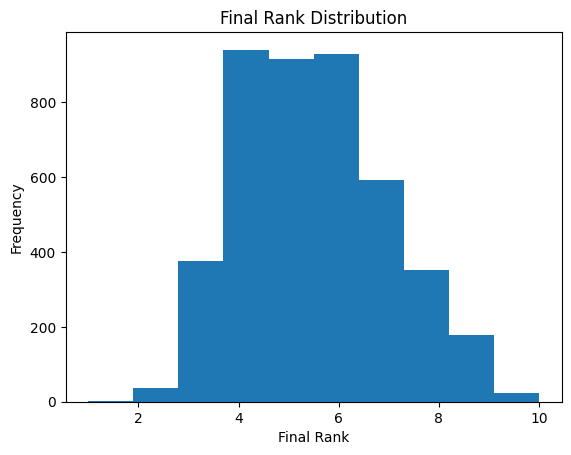

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Đặt số lượng ranks là 10
num_ranks = 10

# Tạo các window specification để tính toán percentile
windowSpec = Window.orderBy(F.col("Recency").desc())
windowSpecFreq = Window.orderBy(F.col("Frequency").desc())
windowSpecMonetary = Window.orderBy(F.col("Monetary").desc())

# Tính toán rank cho Recency, Frequency và Monetary
result_df = result_df.withColumn("RecencyRank", F.ntile(num_ranks).over(windowSpec))
result_df = result_df.withColumn("FrequencyRank", F.ntile(num_ranks).over(windowSpecFreq))
result_df = result_df.withColumn("MonetaryRank", F.ntile(num_ranks).over(windowSpecMonetary))

# Tính toán rank cuối cùng bằng cách lấy trung bình cộng của ba rank trên
result_df = result_df.withColumn("FinalRank", (
    F.col("RecencyRank") + F.col("FrequencyRank") + F.col("MonetaryRank")) / 3)

# Chuyển đổi sang kiểu số nguyên và làm tròn
result_df = result_df.withColumn("FinalRank", F.round(F.col("FinalRank")).cast("integer"))

# Hiển thị DataFrame mới với các rank đã được tính toán
result_df.show()

# Vẽ biểu đồ histogram cho cột 'FinalRank'
result_df.toPandas()['FinalRank'].plot(kind='hist', bins=num_ranks, title='Final Rank Distribution')
plt.xlabel('Final Rank')
plt.ylabel('Frequency')
plt.show()


Điều này cho thấy tập khách hàng của công ty đa phần sẽ nằm ở những điểm rank nằm trong khoảng trung bình, chẳng hạn từ 4-6. Với các điểm rank quá cao hoặc quá thấp thì số lượng khách hàng tập trung càng thấp.

Dựa vào biểu đồ, ta cũng có thể phân tập khách hàng thành 3 nhóm:

- Khách hàng ít tiềm năng - nhãn Low: Rank từ [0, 4)
- Khách hàng thông thường - Normal: Rank từ [4, 7)
- Khách hàng VIP - nhãn VIP: Rank [7, 9]


## Thống kê số lượng khách hàng theo mỗi Segment

+----------+--------------+-------+---------+------------------+----------+-----------+-------------+------------+---------+-------+
|CustomerID|       Country|Recency|Frequency|          Monetary|cluster_id|RecencyRank|FrequencyRank|MonetaryRank|FinalRank|Segment|
+----------+--------------+-------+---------+------------------+----------+-----------+-------------+------------+---------+-------+
|     14646|   Netherlands|      1|       45|280206.01928541064|         1|         10|            1|           1|        4| Normal|
|     18102|United Kingdom|      0|       26|259657.30005669594|         1|         10|            1|           1|        4| Normal|
|     17450|United Kingdom|      8|       27| 194390.7903842926|         1|          9|            1|           1|        4| Normal|
|     16446|United Kingdom|      0|        2|168472.49374997616|         1|         10|            7|           1|        6| Normal|
|     14911|          EIRE|      1|      132|143711.16971421242|     

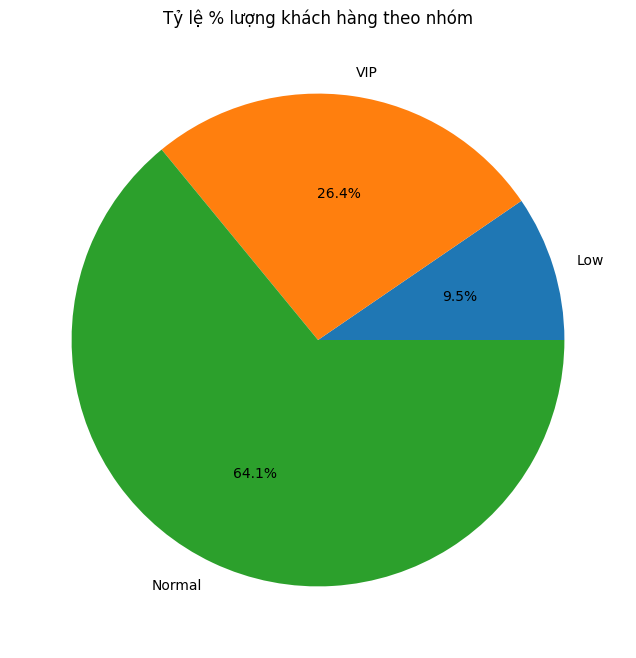

In [ ]:
from pyspark.sql.functions import when

# Xác định nhóm dựa trên 'Final Rank'
def determine_segment(rank):
    if rank < 4:
        return 'Low'
    elif rank < 7:
        return 'Normal'
    else:
        return 'VIP'

# Thêm cột 'Segment' vào DataFrame dựa trên giá trị 'Final Rank'
segment_udf = F.udf(determine_segment, StringType())

result_df = result_df.withColumn("Segment", segment_udf("FinalRank"))

# Hiển thị DataFrame với cột 'Segment' mới
result_df.show()

# Tạo biểu đồ pie chart để hiển thị tỷ lệ phần trăm của từng nhóm
segment_counts = result_df.groupBy("Segment").count()

# Chuyển đổi sang Pandas DataFrame để vẽ biểu đồ
segment_counts_pd = segment_counts.toPandas().set_index("Segment")

# Vẽ biểu đồ pie chart
segment_counts_pd.plot.pie(y='count', autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Tỷ lệ % lượng khách hàng theo nhóm')
plt.ylabel('')  # Xóa nhãn y axis cho biểu đồ pie
plt.show()

Kết quả cho thấy số lượng khách hàng VIP của công ty rất ít. Công ty cần có chính sách thay đổi sản phẩm để bắt kịp thị hiếu thị trường hoặc tăng cường marketing để thu hút khách hàng tiêu dùng nhiều hơn.

Tiếp theo chúng ta sẽ visualize biểu đồ theo doanh số, tần suất mua hàng, thời gian quay trở lại của các nhóm khách hàng sau khi đã segment.

+-------+------------------+
|Segment|     TotalMonetary|
+-------+------------------+
|    Low|1893040.1198430639|
|    VIP| 375906.9899457897|
| Normal| 6642525.365836576|
+-------+------------------+



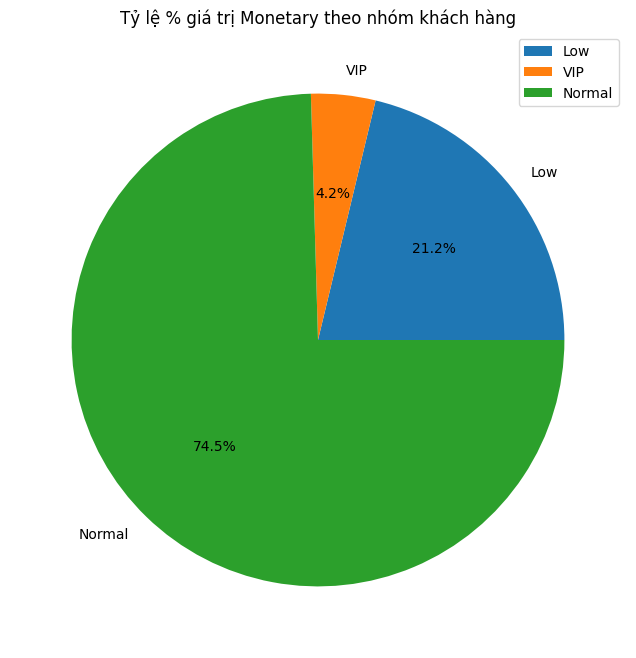

In [ ]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Tính tổng giá trị Monetary cho mỗi Segment
segment_monetary_total = result_df.groupBy("Segment").agg(F.sum("Monetary").alias("TotalMonetary"))

# Hiển thị tổng giá trị Monetary cho mỗi Segment
segment_monetary_total.show()

# Chuyển đổi kết quả sang Pandas DataFrame để vẽ biểu đồ
segment_monetary_total_pd = segment_monetary_total.toPandas().set_index("Segment")

# Vẽ biểu đồ pie chart cho tổng giá trị Monetary của mỗi Segment
segment_monetary_total_pd.plot.pie(y='TotalMonetary', autopct='%1.1f%%', figsize=(8, 8), legend=True)
plt.title('Tỷ lệ % giá trị Monetary theo nhóm khách hàng')
plt.ylabel('')  # Xóa nhãn y axis cho biểu đồ pie
plt.show()

Khách hàng normal lại là khách hàng mang lại doanh số lớn nhất cho công ty, chiến tới gần 80%. Công ty vẫn chưa thể đạt được mục tiêu 20% khách hàng VIP mang lại 80% lợi nhuận.

+-------+------------------+
|Segment|   AverageMonetary|
+-------+------------------+
|    Low| 4561.542457453166|
|    VIP| 327.7305928036527|
| Normal|2385.9645710619884|
+-------+------------------+



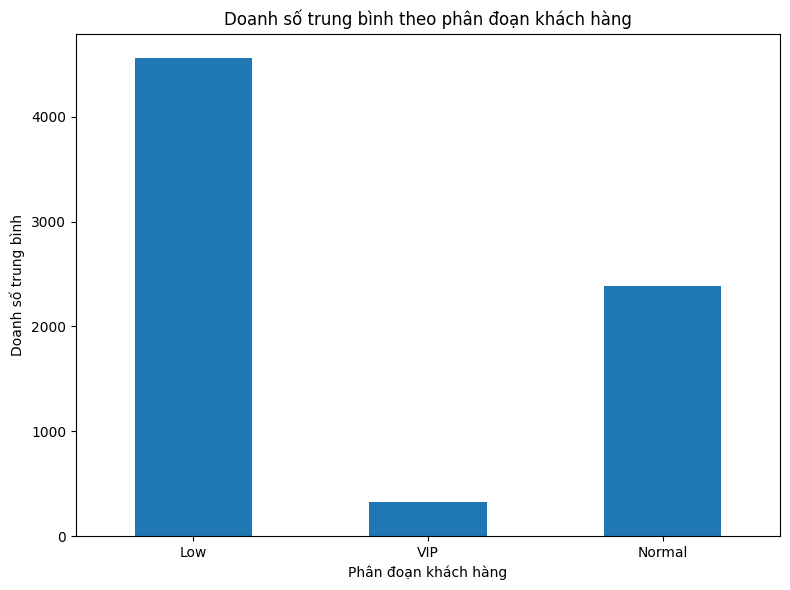

In [ ]:
from pyspark.sql.functions import avg

# Tính giá trị trung bình của 'Monetary' cho mỗi phân đoạn
segment_monetary_mean = result_df.groupBy("Segment").agg(avg("Monetary").alias("AverageMonetary"))

# Hiển thị giá trị trung bình của 'Monetary' cho mỗi phân đoạn
segment_monetary_mean.show()

# Chuyển đổi kết quả sang Pandas DataFrame để vẽ biểu đồ
segment_monetary_mean_pd = segment_monetary_mean.toPandas().set_index("Segment")

# Vẽ biểu đồ cột cho giá trị trung bình 'Monetary' của mỗi phân đoạn
segment_monetary_mean_pd['AverageMonetary'].plot(kind='bar', figsize=(8, 6))
plt.title('Doanh số trung bình theo phân đoạn khách hàng')
plt.xlabel('Phân đoạn khách hàng')
plt.ylabel('Doanh số trung bình')
plt.xticks(rotation=0)  # Giữ cho nhãn trục x ngang
plt.tight_layout()  # Điều chỉnh layout để không bị chắn chữ
plt.show()


Trung bình 1 khách hàng VIP tiêu dưới 1000 đơn vị tiền tệ trong khi sự lớn nhất là khách thuộc rank Low và Normal có giá trị 1 nửa

- Khách hàng Low: Có doanh số trung bình cao nhất so với hai nhóm còn lại. Điều này có thể chỉ ra rằng mặc dù họ có thứ hạng thấp trong việc tương tác hoặc mua hàng gần đây (Recency) và tần suất mua hàng (Frequency), nhưng mỗi khi họ mua hàng, họ chi tiêu nhiều, hoặc có thể họ là khách hàng mua sắm lớn không định kỳ.

- Khách hàng VIP: Có doanh số trung bình thấp nhất, điều này không phù hợp với kỳ vọng thông thường về một khách hàng VIP. Điều này có thể gợi ý rằng các tiêu chí để xác định khách hàng VIP cần được xem xét lại, hoặc có thể họ mua sắm thường xuyên nhưng với các đơn hàng có giá trị thấp.

- Khách hàng Normal: Nằm ở mức độ trung bình giữa hai nhóm còn lại về doanh số, điều này có thể phản ánh hành vi mua sắm đều đặn với giá trị mua hàng trung bình.

+-------+------------------+
|Segment|  AverageFrequency|
+-------+------------------+
|    Low| 7.053012048192771|
|    VIP|1.3417611159546643|
| Normal| 4.434626436781609|
+-------+------------------+



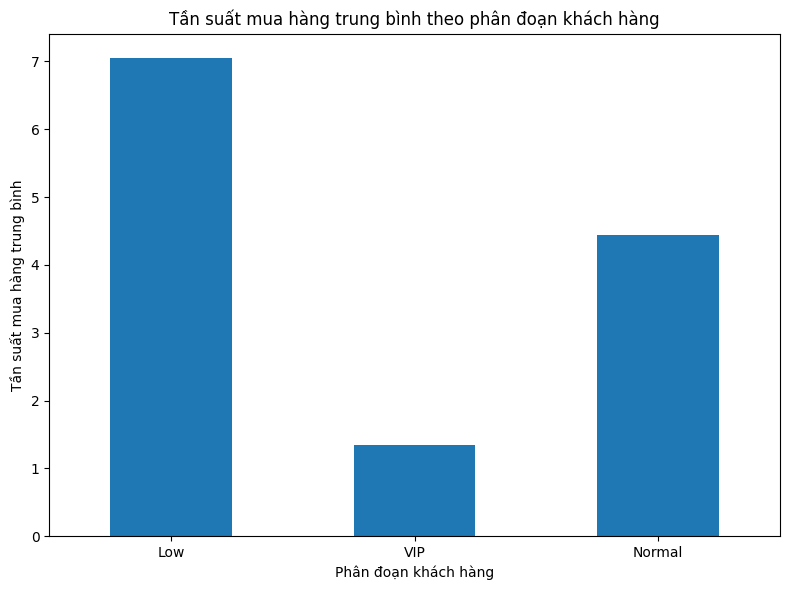

In [ ]:
# Tính tần suất mua hàng trung bình cho mỗi phân đoạn
segment_frequency_mean = result_df.groupBy("Segment").agg(avg("Frequency").alias("AverageFrequency"))

# Hiển thị tần suất mua hàng trung bình cho mỗi phân đoạn
segment_frequency_mean.show()

# Chuyển đổi kết quả sang Pandas DataFrame để vẽ biểu đồ
segment_frequency_mean_pd = segment_frequency_mean.toPandas().set_index("Segment")

# Vẽ biểu đồ cột cho tần suất mua hàng trung bình của mỗi phân đoạn
segment_frequency_mean_pd['AverageFrequency'].plot(kind='bar', figsize=(8, 6))
plt.title('Tần suất mua hàng trung bình theo phân đoạn khách hàng')
plt.xlabel('Phân đoạn khách hàng')
plt.ylabel('Tần suất mua hàng trung bình')
plt.xticks(rotation=0)  # Giữ cho nhãn trục x ngang
plt.tight_layout()  # Điều chỉnh layout để không bị chắn chữ
plt.show()


- Khách hàng Low: Có tần suất mua hàng trung bình cao nhất. Điều này có thể cho thấy rằng, dù họ có thứ hạng thấp trong các chỉ số khác, họ vẫn mua sắm thường xuyên hơn so với hai nhóm còn lại.

- Khách hàng VIP: Tần suất mua hàng trung bình của họ thấp hơn so với phân đoạn Low, điều này có thể gây ngạc nhiên vì khách hàng VIP thường được kỳ vọng là những người mua sắm thường xuyên hơn. Điều này có thể chỉ ra rằng tiêu chí phân loại VIP cần được xem xét lại, hoặc VIP có thể được đánh giá cao vì các yếu tố khác như giá trị mua hàng lớn hơn dù họ mua ít lần hơn.

- Khách hàng Normal: Có tần suất mua hàng trung bình thấp hơn so với phân đoạn Low nhưng cao hơn phân đoạn VIP. Điều này có thể phản ánh hành vi mua sắm đều đặn nhưng không thường xuyên như khách hàng Low.

+-------+----------+
|Segment|MaxRecency|
+-------+----------+
|    Low|       372|
|    VIP|       262|
| Normal|       373|
+-------+----------+



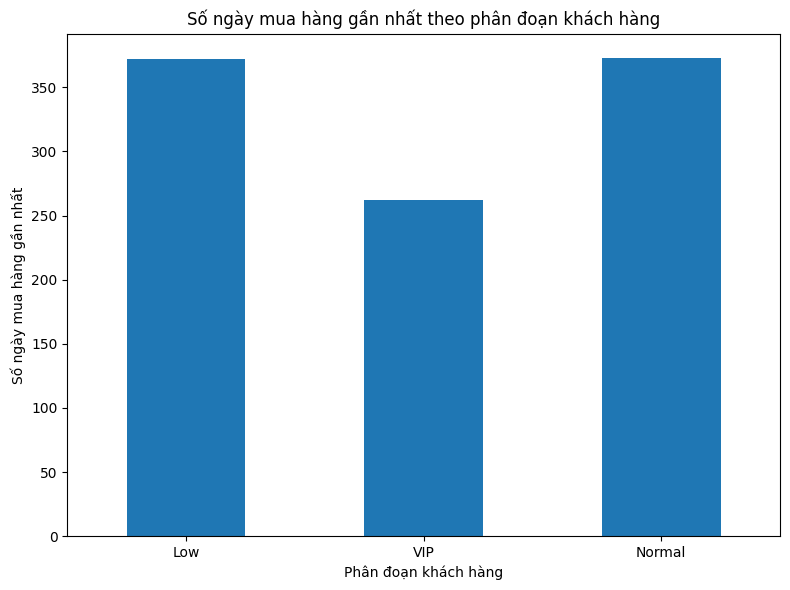

In [ ]:
from pyspark.sql.functions import max as spark_max

# Tính ngày mua hàng gần nhất cho mỗi phân đoạn
segment_recency = result_df.groupBy("Segment").agg(spark_max("Recency").alias("MaxRecency"))

# Hiển thị ngày mua hàng gần nhất cho mỗi phân đoạn
segment_recency.show()

# Chuyển đổi kết quả sang Pandas DataFrame để vẽ biểu đồ
segment_recency_pd = segment_recency.toPandas().set_index("Segment")

# Vẽ biểu đồ cột cho ngày mua hàng gần nhất của mỗi phân đoạn
segment_recency_pd['MaxRecency'].plot(kind='bar', figsize=(8, 6))
plt.title('Số ngày mua hàng gần nhất theo phân đoạn khách hàng')
plt.xlabel('Phân đoạn khách hàng')
plt.ylabel('Số ngày mua hàng gần nhất')
plt.xticks(rotation=0)  # Giữ cho nhãn trục x ngang
plt.tight_layout()  # Điều chỉnh layout để không bị chắn chữ
plt.show()


- Khách hàng Low: Có số ngày mua hàng gần nhất thấp nhất, cho thấy rằng nhóm này đã mua sắm gần đây nhất so với các nhóm khác. Điều này có thể chỉ ra rằng dù họ có thứ hạng thấp trong các chỉ số khác, họ có xu hướng quay lại mua sắm nhanh chóng sau mỗi giao dịch.

- Khách hàng VIP: Có số ngày mua hàng gần nhất cao hơn so với phân đoạn Low nhưng thấp hơn phân đoạn Normal. Điều này gợi ý rằng khách hàng VIP có thể không mua sắm thường xuyên như khách hàng Low, nhưng họ vẫn mua sắm gần đây hơn so với khách hàng Normal.

- Khách hàng Normal: Có số ngày mua hàng gần nhất cao nhất, cho thấy họ ít mua sắm gần đây nhất so với hai nhóm còn lại. Điều này có thể phản ánh một mức độ trung thành thấp hoặc một chu kỳ mua hàng dài hơn.

# Kết quả KMeans

In [ ]:
result_df.show()

+----------+--------------+-------+---------+------------------+----------+-----------+-------------+------------+---------+-------+
|CustomerID|       Country|Recency|Frequency|          Monetary|cluster_id|RecencyRank|FrequencyRank|MonetaryRank|FinalRank|Segment|
+----------+--------------+-------+---------+------------------+----------+-----------+-------------+------------+---------+-------+
|     14646|   Netherlands|      1|       45|280206.01928541064|         1|         10|            1|           1|        4| Normal|
|     18102|United Kingdom|      0|       26|259657.30005669594|         1|         10|            1|           1|        4| Normal|
|     17450|United Kingdom|      8|       27| 194390.7903842926|         1|          9|            1|           1|        4| Normal|
|     16446|United Kingdom|      0|        2|168472.49374997616|         1|         10|            7|           1|        6| Normal|
|     14911|          EIRE|      1|      132|143711.16971421242|     

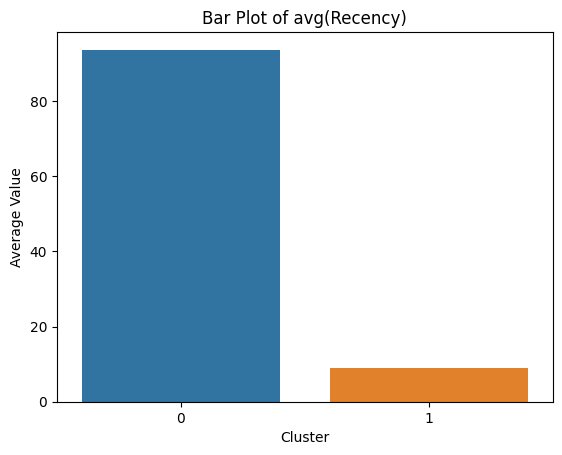

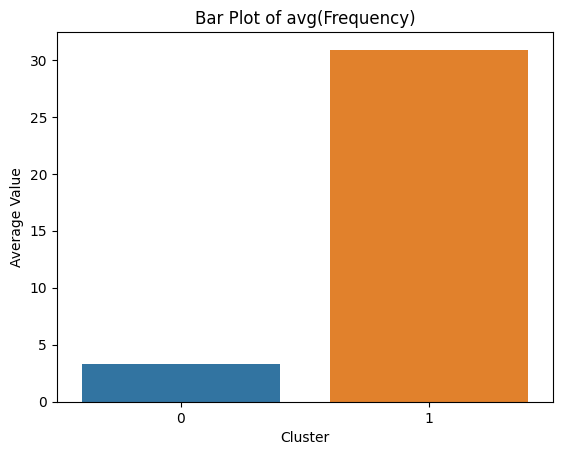

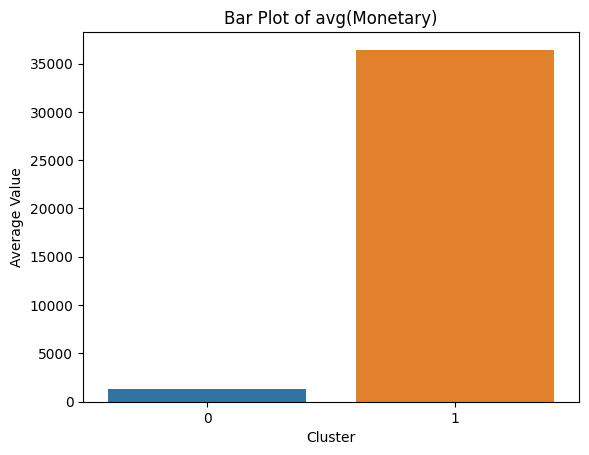

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo SparkSession
spark = SparkSession.builder.appName("RFM_Clustering").getOrCreate()

# Tính giá trị trung bình cho mỗi cột theo 'cluster'
avg_df = result_df.groupBy('cluster_id').avg('Recency', 'Frequency', 'Monetary')

# Chuyển đổi DataFrame Spark thành Pandas DataFrame để sử dụng Seaborn cho việc vẽ biểu đồ
avg_df_pd = avg_df.toPandas()

# Danh sách các cột bạn muốn vẽ biểu đồ
columns_to_plot = ['avg(Recency)', 'avg(Frequency)', 'avg(Monetary)']

# Vẽ biểu đồ barplot cho mỗi cột
for column in columns_to_plot:
    sns.barplot(x='cluster_id', y=column, data=avg_df_pd)
    plt.title(f'Bar Plot of {column}')
    plt.ylabel('Average Value')
    plt.xlabel('Cluster')
    plt.show()


# Export results

In [ ]:
csv_path = "/content/drive/MyDrive/result_df.csv"

# Save the DataFrame to a CSV file
result_df.write.csv(csv_path, header=True, mode="overwrite")

In [ ]:
df.show()

+--------------------+
|  feature_scaled_pca|
+--------------------+
|[-0.1667804548667...|
|[-0.0997488796308...|
|[-1.0677130928056...|
|[-5.7477408053009...|
|[1.26617379867312...|
|[0.38819404006277...|
|[-0.4841222327072...|
|[-0.5356126700926...|
|[1.07671021853772...|
|[1.05147296232073...|
|[-0.1270855439230...|
|[0.01211444094994...|
|[0.50111239835097...|
|[1.00552989998967...|
|[-0.1657345082635...|
|[-3.6055076053181...|
|[-0.1470002435722...|
|[-0.5714037982462...|
|[-1.3905629765941...|
|[-0.6076188608119...|
+--------------------+
only showing top 20 rows

